In [2]:
! export LD_PRELOAD=/usr/lib/aarch64-linux-gnu/libgomp.so.1

In [3]:
import cv2 # need to import cv2 first, causing errors otherwise
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import os

import numpy as np

labels = ['normal', 'carrying','threat']

/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No such file or directory']
  warnings.warn(f"file system 

In [67]:
root_path = os.getcwd()
root_path

'/home/hivebotics/Desktop/CS4243/MiniProject'

In [5]:
# Manipulatable Variables
img_size = 224


""" Gets images from directory and returns them in a class labelled numpy array """
def get_data(data_dir, label):
  data = []
  # for label in labels:
    # path = os.path.join(data_dir, label)
  path = data_dir
  print("Path" + path)
  class_num = labels.index(label)
  for img_path in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path, img_path))[...,::-1]  # convert BGR to RGB format
      resized_arr = cv2.resize(img_arr, (img_size, img_size))       # Reshaping images to preferred size
      data.append([resized_arr, class_num])
    except Exception as e:
      print(e)

  return np.array(data)

In [6]:
# Load the data

normal_train  = os.path.join(root_path, 'normal/train')
normal_val    = os.path.join(root_path, 'normal/val')
normal_test   = os.path.join(root_path, 'normal/test')

carrying_train  = os.path.join(root_path, 'carrying/train')
carrying_val    = os.path.join(root_path, 'carrying/val')
carrying_test   = os.path.join(root_path, 'carrying/test')

threat_train  = os.path.join(root_path, 'threat/train')
threat_val    = os.path.join(root_path, 'threat/val')
threat_test   = os.path.join(root_path, 'threat/test')

In [7]:
normal_train_df = get_data(normal_train, 'normal')

Path/home/hivebotics/Desktop/CS4243/MiniProject/normal/train


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [8]:
normal_val_df = get_data(normal_val, 'normal')

Path/home/hivebotics/Desktop/CS4243/MiniProject/normal/val


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [9]:
normal_test_df = get_data(normal_test, 'normal')

Path/home/hivebotics/Desktop/CS4243/MiniProject/normal/test


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [10]:
carrying_train_df = get_data(carrying_train, 'carrying')

Path/home/hivebotics/Desktop/CS4243/MiniProject/carrying/train
'NoneType' object is not subscriptable


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [11]:
carrying_val_df = get_data(carrying_val, 'carrying')

Path/home/hivebotics/Desktop/CS4243/MiniProject/carrying/val


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [12]:
carrying_test_df = get_data(carrying_test, 'carrying')

Path/home/hivebotics/Desktop/CS4243/MiniProject/carrying/test


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [13]:
threat_train_df = get_data(threat_train, 'threat')

Path/home/hivebotics/Desktop/CS4243/MiniProject/threat/train


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [14]:
threat_val_df = get_data(threat_val, 'threat')

Path/home/hivebotics/Desktop/CS4243/MiniProject/threat/val


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [15]:
threat_test_df = get_data(threat_test, 'threat')

Path/home/hivebotics/Desktop/CS4243/MiniProject/threat/test


/tmp/ipykernel_70711/3285378614.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [16]:
print(len(normal_train_df))
print(len(normal_val_df))
print(len (normal_test_df))

print(len(carrying_train_df))
print(len(carrying_val_df))
print(len(carrying_test_df))

print(len(threat_train_df))
print(len(threat_test_df))
print(len(threat_test_df))

1422
433
422
829
250
255
1034
295
295


In [17]:
train_df = np.concatenate((normal_train_df, carrying_train_df, threat_train_df), axis=0)
val_df = np.concatenate((normal_val_df, carrying_val_df, threat_val_df), axis=0)
test_df = np.concatenate((normal_test_df, carrying_test_df, threat_test_df), axis=0)

print(len(train_df))
print(len(val_df))
print(len(test_df))

# print(train_df.shape)

3285
992
972


In [18]:
# Data Augmentation (To Explore whether this helps)

Text(0.5, 1.0, 'threat')

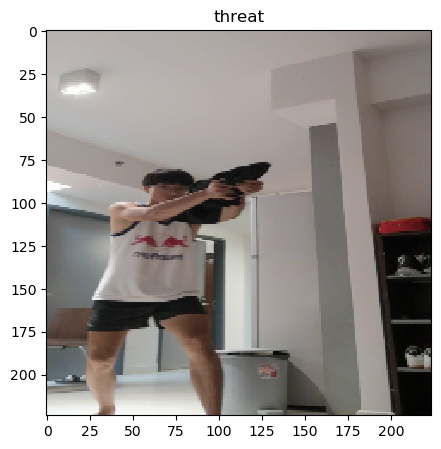

In [19]:
plt.figure(figsize = (5,5))
plt.imshow(threat_train_df[5][0])
plt.title(labels[threat_train_df[5][1]])

In [20]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train_df:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val_df:
  x_val.append(feature)
  y_val.append(label)


# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

y_train = np.array(y_train)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range =0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip=False)

datagen.fit(x_train)

In [21]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax")) # Final layer should output 3 classes hence 3 classes

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [22]:
opt = Adam(lr=0.0003) # Using 3e-4 learning rate recommended for Adam
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val), callbacks=[callback])

2022-11-11 04:12:10.587230: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1977937920 exceeds 10% of free system memory.


Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


103/103 [==============================] - 87s 831ms/step - loss: 1.0521 - accuracy: 0.4411 - val_loss: 0.9607 - val_accuracy: 0.5212
Epoch 2/25
103/103 [==============================] - 79s 765ms/step - loss: 0.9011 - accuracy: 0.6018 - val_loss: 0.8290 - val_accuracy: 0.6522
Epoch 3/25
103/103 [==============================] - 80s 773ms/step - loss: 0.7396 - accuracy: 0.6858 - val_loss: 0.7368 - val_accuracy: 0.7218
Epoch 4/25
103/103 [==============================] - 76s 734ms/step - loss: 0.6031 - accuracy: 0.7562 - val_loss: 0.6680 - val_accuracy: 0.7450
Epoch 5/25
103/103 [==============================] - 75s 727ms/step - loss: 0.4574 - accuracy: 0.8244 - val_loss: 0.5403 - val_accuracy: 0.8155
Epoch 6/25
103/103 [==============================] - 79s 766ms/step - loss: 0.3429 - accuracy: 0.8776 - val_loss: 0.5534 - val_accuracy: 0.8327
Epoch 7/25
103/103 [==============================] - 76s 739ms/step - loss: 0.2584 - accuracy: 0.9099 - val_loss: 0.5697 - val_accuracy: 0.8

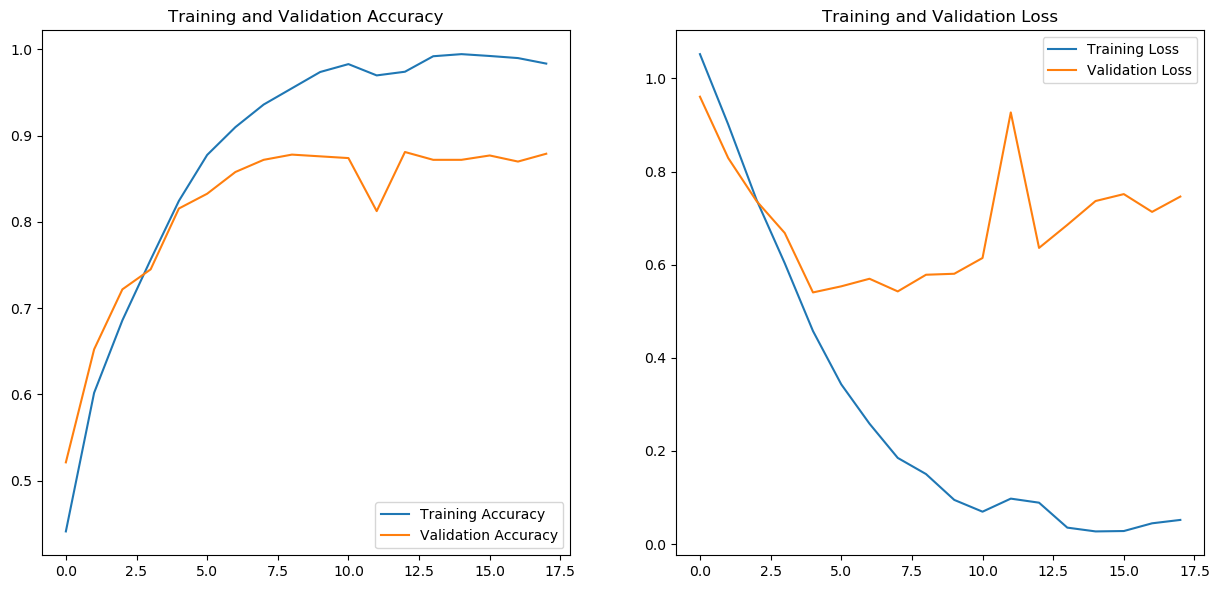

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
# Test against validation set

predictions =model.predict(x_val) 
predictions =np.argmax(predictions,axis=1)

# predictions = model.predict_classes(x_val)
# predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Normal (Class 0)','Carrying (Class 1)', 'Threat (Class 2)']))

31/31 [==============================] - 7s 226ms/step
                    precision    recall  f1-score   support

  Normal (Class 0)       0.93      0.90      0.92       433
Carrying (Class 1)       0.83      0.82      0.82       250
  Threat (Class 2)       0.85      0.90      0.87       309

          accuracy                           0.88       992
         macro avg       0.87      0.87      0.87       992
      weighted avg       0.88      0.88      0.88       992



In [35]:
# Test against Test Set

x_test = []
y_test = []

for feature, label in test_df:
  x_test.append(feature)
  y_test.append(label)
    
predictions =model.predict(np.array(x_test)) 
predictions =np.argmax(predictions,axis=1)

# predictions_test = model.predict(x_test)
# predictions_test = predictions_test.reshape(1,-1)[0]
print(classification_report(y_test, predictions,target_names = ['Normal (Class 0)','Carrying (Class 1)', 'Threat (Class 2)'] ))

31/31 [==============================] - 7s 220ms/step
                    precision    recall  f1-score   support

  Normal (Class 0)       0.88      0.86      0.87       422
Carrying (Class 1)       0.77      0.82      0.80       255
  Threat (Class 2)       0.85      0.83      0.84       295

          accuracy                           0.84       972
         macro avg       0.83      0.84      0.84       972
      weighted avg       0.84      0.84      0.84       972



In [36]:
model.save(os.path.join(root_path, 'model/'))

INFO:tensorflow:Assets written to: /home/hivebotics/Desktop/CS4243/MiniProject/model/assets


INFO:tensorflow:Assets written to: /home/hivebotics/Desktop/CS4243/MiniProject/model/assets


In [43]:
print("Evaluate model on test data")
results = model.evaluate(np.array(x_test), np.array(y_test), batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 7s 816ms/step - loss: 193.0742 - accuracy: 0.8416
test loss, test acc: [193.07424926757812, 0.8415637612342834]


In [64]:
# Testing prediction of individual image


new_img_path = os.path.join(carrying_test, 'carry2(Wu Yuhao)0.30476_200.png')

# new_img_path = tf.keras.utils.get_file(origin=new_img_path)

img = tf.keras.utils.load_img(
    new_img_path, target_size=(224, 224)
)



img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



latest_prediction = model.predict(img_array)
score = tf.nn.softmax(latest_prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 83ms/step
This image most likely belongs to threat with a 57.61 percent confidence.


In [65]:
new_model = tf.keras.models.load_model(os.path.join(root_path, 'model/'))
latest_prediction = new_model.predict(img_array)
score = tf.nn.softmax(latest_prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 200ms/step
This image most likely belongs to threat with a 57.61 percent confidence.
